### Obtain

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Scrub

In [4]:
df = df.drop(columns="id") ## drop 'id' column
df.head(0)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [5]:
df.info() # check datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


'date' may have to be converted to int64 somehow. Or made into another feature

floors needs conversion. why would there be non-integer floors?

sqft_basement needs conversion to float or integer

yr_renovated be made integer

#### Changing Datatypes

In [6]:
df.floors.describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [7]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

there seems to be a reason for # floors. will keep, may change to categorical var later

In [8]:
df.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [9]:
df.sqft_basement.unique().tolist()

['0.0',
 '400.0',
 '910.0',
 '1530.0',
 '?',
 '730.0',
 '1700.0',
 '300.0',
 '970.0',
 '760.0',
 '720.0',
 '700.0',
 '820.0',
 '780.0',
 '790.0',
 '330.0',
 '1620.0',
 '360.0',
 '588.0',
 '1510.0',
 '410.0',
 '990.0',
 '600.0',
 '560.0',
 '550.0',
 '1000.0',
 '1600.0',
 '500.0',
 '1040.0',
 '880.0',
 '1010.0',
 '240.0',
 '265.0',
 '290.0',
 '800.0',
 '540.0',
 '710.0',
 '840.0',
 '380.0',
 '770.0',
 '480.0',
 '570.0',
 '1490.0',
 '620.0',
 '1250.0',
 '1270.0',
 '120.0',
 '650.0',
 '180.0',
 '1130.0',
 '450.0',
 '1640.0',
 '1460.0',
 '1020.0',
 '1030.0',
 '750.0',
 '640.0',
 '1070.0',
 '490.0',
 '1310.0',
 '630.0',
 '2000.0',
 '390.0',
 '430.0',
 '850.0',
 '210.0',
 '1430.0',
 '1950.0',
 '440.0',
 '220.0',
 '1160.0',
 '860.0',
 '580.0',
 '2060.0',
 '1820.0',
 '1180.0',
 '200.0',
 '1150.0',
 '1200.0',
 '680.0',
 '530.0',
 '1450.0',
 '1170.0',
 '1080.0',
 '960.0',
 '280.0',
 '870.0',
 '1100.0',
 '460.0',
 '1400.0',
 '660.0',
 '1220.0',
 '900.0',
 '420.0',
 '1580.0',
 '1380.0',
 '475.0',
 

In [10]:
true_objects = []
for val in df.sqft_basement.unique().tolist():
    try:
        float(val)
    except ValueError:
        true_objects.append(val)
print(true_objects)

['?']


removing the '?' entry, so that sqft_basement can be integer

In [11]:
df = df[df.sqft_basement != '?']

In [12]:
df['sqft_basement'] = df.sqft_basement.astype(float, inplace=True)

refuses integer. settling on float

In [13]:
true_objects = []
for val in df.sqft_basement.unique().tolist():
    try:
        float(val)
    except ValueError:
        true_objects.append(val)
print(true_objects)

[]


In [14]:
df.sqft_basement.dtype

dtype('float64')

waterfront is mostly empty so drop it

In [15]:
df.waterfront[df.waterfront > 0].describe()

count    142.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: waterfront, dtype: float64

In [16]:
df.waterfront[df.waterfront == 0].shape[0]

18662

In [17]:
df.waterfront.shape[0]

21143

In [18]:
df.drop(['waterfront'], axis=1, inplace=True);

yr_renovated is similar to waterfront. but will be kept as an example of a boolean

In [19]:
df.yr_renovated[df.yr_renovated > 0].describe()

count     723.000000
mean     1996.053942
std        15.430251
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.500000
max      2015.000000
Name: yr_renovated, dtype: float64

In [20]:
df.yr_renovated[df.yr_renovated == 0].shape[0]

16666

In [21]:
df.yr_renovated.shape[0]

21143

date (sold) likely contains little information

In [22]:
df.drop(['date'], axis=1, inplace=True);

#### Convert Categorical data encoded as integers to String type

categoricals hiding as integers

In [23]:
df.select_dtypes(include='int64').head()

,bedrooms,sqft_living,sqft_lot,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
0,3,1180,5650,3,7,1180,1955,98178,1340,5650
1,3,2570,7242,3,7,2170,1951,98125,1690,7639
2,2,770,10000,3,6,770,1933,98028,2720,8062
3,4,1960,5000,5,7,1050,1965,98136,1360,5000
4,3,1680,8080,3,8,1680,1987,98074,1800,7503


are categorical vars: yr_built, zipcode

bedroom, condition, grade, are probably discrete numerical

yr_built could be converted to 'age', a numerical var

the rest are true integers

In [24]:
df['zipcode'] = df.zipcode.astype(object)

categoricals hiding as floats

In [25]:
df.select_dtypes(include='float64').head(0)

,price,bathrooms,floors,view,sqft_basement,yr_renovated,lat,long


In [26]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [27]:
df.view.dtype

dtype('float64')

view can be made integer later

#### Handle nulls

In [28]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [29]:
df.dropna(subset=['view'], inplace=True);

In [30]:
df.view.isna().sum()

0

In [31]:
df.yr_renovated.isna().sum()

3742

In [32]:
df.yr_renovated.describe()

count    17340.000000
mean        83.111419
std        398.756281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [33]:
df.dropna(subset=['yr_renovated'], inplace=True);

In [34]:
df.yr_renovated.isna().sum()

0

In [35]:
df['view'] = df.view.astype('int64')

In [36]:
df.view.dtype

dtype('int64')

In [37]:
df.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

#### _(minor)_ Feature engineering

converting 'yr_built' to 'age'

In [38]:
df.yr_built.head()

0    1955
1    1951
3    1965
4    1987
5    2001
Name: yr_built, dtype: int64

In [39]:
age_list = []
for year in df['yr_built']:
    n = 2019-year
    age_list.append(n)

In [40]:
df['age'] = age_list

In [41]:
df.age.head()

0    64
1    68
3    54
4    32
5    18
Name: age, dtype: int64

In [42]:
df.drop(['yr_built'], axis=1, inplace=True);

converting yr_renovated to a boolean

In [43]:
df.yr_renovated.head()

0       0.0
1    1991.0
3       0.0
4       0.0
5       0.0
Name: yr_renovated, dtype: float64

In [44]:
df.yr_renovated[df.yr_renovated > 0].describe()

count     722.000000
mean     1996.055402
std        15.440898
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.750000
max      2015.000000
Name: yr_renovated, dtype: float64

In [45]:
df.yr_renovated[df.yr_renovated > 0].value_counts().sum()

722

there are only 722 years - not a lot of information. "Renovated or Not" is more useful information

In [46]:
yr_list = []
for year in df.yr_renovated:
    if year > 0:
        b = 1
        yr_list.append(b)
    else:
        b = 0
        yr_list.append(b)

In [47]:
df['renovated'] = yr_list

In [48]:
df['renovated'].head()

0    0
1    1
3    0
4    0
5    0
Name: renovated, dtype: int64

In [49]:
df.drop(['yr_renovated'], axis=1, inplace=True);

#### Multicollinearity

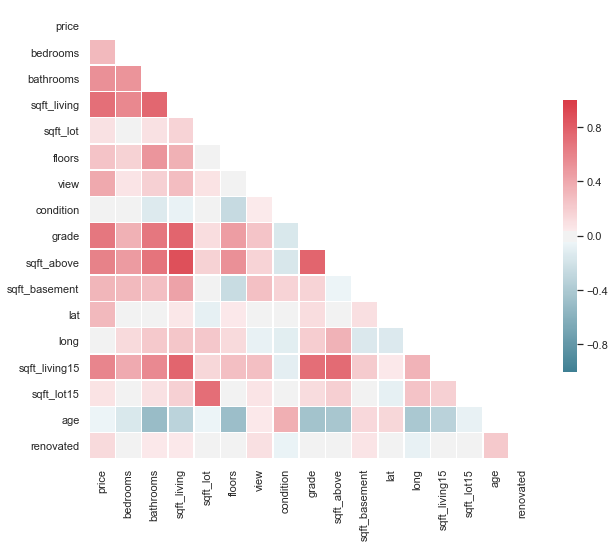

In [50]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### Highest Correlations with Target

In [51]:
# (df.corr() > .5)

best predictors of price @ r>.5 : bathrooms, sqft_living, grade, sqft_above, sqft_living15; (r>.7 is too high a threshold for finding price predictors)

##### Feature selection (removal)

In [52]:
# (abs(df.corr()) > .7).iloc[0:4]
# (abs(df.corr()) > .7).iloc[5:10]
# (abs(df.corr()) > .7).iloc[11:16]

considerably correlated features:

price vs sqft_living, bathrooms vs sqft_living, sqft_living vs grade, sqft_living vs sqft_above, sqft_living vs sqft_living15

grade vs sqft_above, grade vs sqft_living15, sqft_above vs grade, sqft_above vs sqft_living15

sqft_lot15 vs sqft_lot

best candidates for removal (occurances of multicollinearity):
    
sqft_living (5)

grade (4)

sqft_living15 (3)

sqft_lot15 (1)

In [53]:
df.drop(['sqft_living','grade','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [54]:
df.head(0)

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_above,sqft_basement,zipcode,lat,long,age,renovated


#### Feature Scaling
is unnecessary for Multiple Linear Regression models

#### Categoricals / One-hot encoding

In [55]:
df.select_dtypes(include='object').head()

,zipcode
0,98178
1,98125
3,98136
4,98074
5,98053


zipcode is the only remaining categorical var.

It can be one-hot encoded

In [56]:
zc = df['zipcode']

In [57]:
zc = pd.get_dummies(df['zipcode'])

In [58]:
zc.head()

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
## to join zipcode dummies to original dataframe
# df = df.join(zc);

In [60]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_above,sqft_basement,zipcode,lat,long,age,renovated
0,221900.0,3,1.00,5650,1.0,0,3,1180,0.0,98178,47.5112,-122.257,64,0
1,538000.0,3,2.25,7242,2.0,0,3,2170,400.0,98125,47.7210,-122.319,68,1
3,604000.0,4,3.00,5000,1.0,0,5,1050,910.0,98136,47.5208,-122.393,54,0
4,510000.0,3,2.00,8080,1.0,0,3,1680,0.0,98074,47.6168,-122.045,32,0
5,1230000.0,4,4.50,101930,1.0,0,3,3890,1530.0,98053,47.6561,-122.005,18,0


#### Outliers

as an example, I'll cull outliers in the target itself

In [61]:
df['price'].describe()

count    1.734000e+04
mean     5.406210e+05
std      3.684592e+05
min      8.000000e+04
25%      3.215000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [62]:
# spread
df.price.max() - df.price.min()

7620000.0

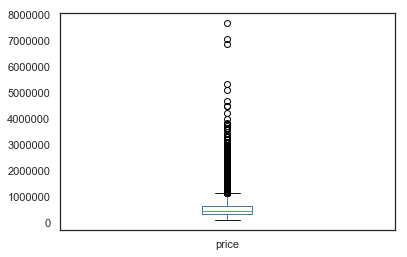

In [63]:
df['price'].plot.box();

In [64]:
df.price[df['price'] > 650000].count() # ***

4188

In [65]:
df.price[df['price'] < 650000].count()

13071

In [66]:
df = df[df['price'] < 650000]

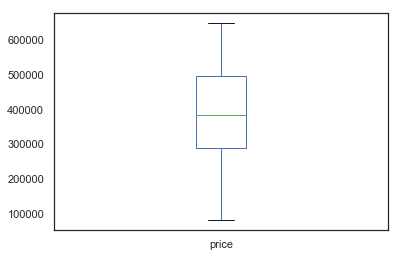

In [67]:
df['price'].plot.box();

In [68]:
df['price'].describe()

count     13071.000000
mean     393157.461480
std      127003.655291
min       80000.000000
25%      290000.000000
50%      385000.000000
75%      495000.000000
max      649990.000000
Name: price, dtype: float64

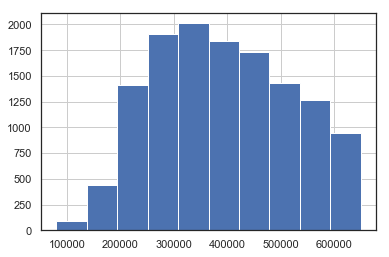

In [73]:
df.price.hist()

### Explore

In [74]:
df.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_above,sqft_basement,lat,long,age,renovated
count,13071.000000,13071.000000,13071.000000,1.307100e+04,13071.000000,13071.000000,13071.000000,13071.000000,13071.000000,13071.000000,13071.000000,13071.000000,13071.000000
mean,393157.461480,3.228368,1.937055,1.325522e+04,1.423571,0.104277,3.395609,1545.387652,234.906664,47.539982,-122.217366,48.513427,0.029302
std,127003.655291,0.893285,0.664821,3.343209e+04,0.532361,0.488809,0.640707,589.180815,373.234343,0.148679,0.142229,28.196357,0.168657
min,80000.000000,1.000000,0.500000,5.720000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,47.155900,-122.519000,4.000000,0.000000
25%,290000.000000,3.000000,1.500000,5.000000e+03,1.000000,0.000000,3.000000,1120.000000,0.000000,47.422450,-122.331000,25.000000,0.000000
50%,385000.000000,3.000000,2.000000,7.442000e+03,1.000000,0.000000,3.000000,1400.000000,0.000000,47.540200,-122.249000,47.000000,0.000000
75%,495000.000000,4.000000,2.500000,9.920000e+03,2.000000,0.000000,4.000000,1860.000000,450.000000,47.680500,-122.134000,67.000000,0.000000
max,649990.000000,33.000000,7.500000,1.164794e+06,3.500000,4.000000,5.000000,5450.000000,2196.000000,47.777600,-121.315000,119.000000,1.000000


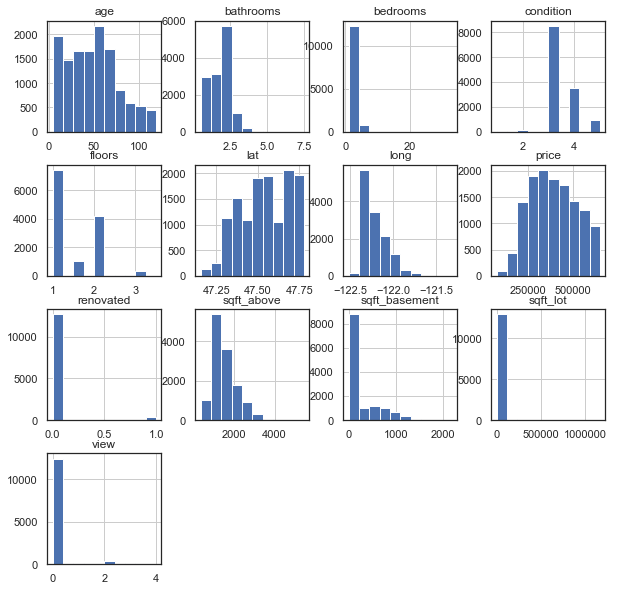

In [91]:
df.hist(figsize=(10,10));

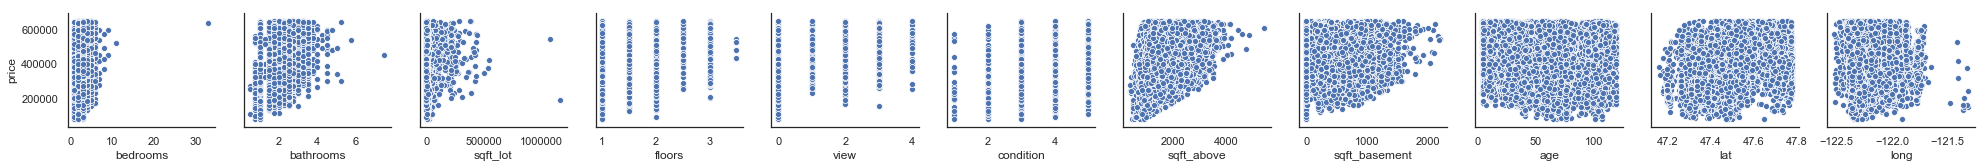

In [87]:
# sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_above', 
#                               'sqft_basement', 'age', 'lat', 'long'], y_vars=['price']);

C:\Users\Sid\Miniconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


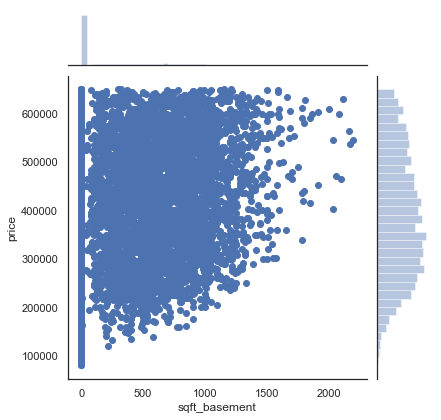

In [98]:
sns.jointplot(x=df.sqft_basement, y=df.price);

In [103]:
# sns.kdeplot(data=df.price, y=df.sqft_basement)